<a href="https://colab.research.google.com/github/kkgan918/apartmentpricepredict/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

dataset source:https://www.kaggle.com/thajegan76/properties-kuala-lumpur-malaysia/data

In [ ]:
df = pd.read_csv('kl_properties.csv', index_col= False)
df.head()

,Title,Price,Area,Category,Size,Bedrooms,Bathrooms
0,"M City Serviced Residence Jalan Ampang 886sf, ...",RM 690 000,AMPANG,Apartments,886 sq.ft.,2 Bedrooms,2 Bathrooms
1,Cheapest fully furnished suria jelatek residen...,RM 420 000,AMPANG,Apartments,858 sq.ft.,3 Bedrooms,2 Bathrooms
2,3bed 2bath Suria Jelatek Condo 5 min to LRT an...,RM 420 000,AMPANG,Apartments,860 sq.ft.,3 Bedrooms,2 Bathrooms
3,"[30% Below,1037sf] Direct Subsale not Auction!...",RM 568 444,AMPANG,Apartments,1037 sq.ft.,3 Bedrooms,2 Bathrooms
4,HOT area | Tiara Ampang | Near Ampang Point | ...,RM 618 000,AMPANG,Apartments,1650 sq.ft.,4 Bedrooms,2 Bathrooms


In [ ]:
df.shape

(7791, 7)

In [ ]:
df.columns

Index(['Title', 'Price', 'Area', 'Category', 'Size', 'Bedrooms', 'Bathrooms'], dtype='object')

In [ ]:
df['Category'].unique()

array(['Apartments'], dtype=object)

In [ ]:
df['Category'].value_counts()

Apartments    7791
Name: Category, dtype: int64

In [ ]:
df['Area'].unique()

array(['AMPANG', 'BANDAR TASIK SELATAN', 'BANGSAR SOUTH', 'BUKIT BINTANG',
       'BUKITJALIL', 'CHERAS', 'DESA PETALING', 'KEPONG', 'KUCHAI LAMA',
       'PANDAN INDAH', 'SENTUL', 'SETIAWANGSA', 'SRI DAMANSARA',
       'TAMAN MELAWATI'], dtype=object)

In [ ]:
df['Area'].value_counts()

CHERAS                  2705
KEPONG                  1061
SENTUL                   929
BUKITJALIL               579
TAMAN MELAWATI           396
KUCHAI LAMA              313
SETIAWANGSA              267
AMPANG                   266
DESA PETALING            253
PANDAN INDAH             251
BANGSAR SOUTH            230
BANDAR TASIK SELATAN     195
SRI DAMANSARA            185
BUKIT BINTANG            161
Name: Area, dtype: int64

In [ ]:
df['Bedrooms'].unique()

array(['2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '1 Bedroom',
       '5 Bedrooms', '8 Bedrooms', '6 Bedrooms', '9 Bedrooms',
       'More than 10 Bedroom', '7 Bedrooms'], dtype=object)

In [ ]:
df['Bedrooms'].value_counts()

3 Bedrooms              5765
2 Bedrooms               824
4 Bedrooms               802
1 Bedroom                286
5 Bedrooms                95
6 Bedrooms                15
8 Bedrooms                 1
9 Bedrooms                 1
More than 10 Bedroom       1
7 Bedrooms                 1
Name: Bedrooms, dtype: int64

In [ ]:
df['Bathrooms'].unique()

array(['2 Bathrooms', '1 Bathroom', '4 Bathrooms', '3 Bathrooms',
       '5 Bathrooms', '6 Bathrooms', '10 Bathrooms', '7 Bathrooms'],
      dtype=object)

In [ ]:
df['Bathrooms'].value_counts()

2 Bathrooms     6169
1 Bathroom       855
3 Bathrooms      556
4 Bathrooms      138
5 Bathrooms       62
6 Bathrooms        7
7 Bathrooms        3
10 Bathrooms       1
Name: Bathrooms, dtype: int64

In [ ]:
df = df.drop(['Title','Category'],axis='columns')
df.shape

(7791, 5)

In [ ]:
#Data Cleaning: Handle NA

In [ ]:
df.isnull().sum()

Price        0
Area         0
Size         0
Bedrooms     0
Bathrooms    0
dtype: int64

In [ ]:
df['Size'].unique()

array(['886 sq.ft.', '858 sq.ft.', '860 sq.ft.', '1037 sq.ft.',
       '1650 sq.ft.', '1250 sq.ft.', '705 sq.ft.', '957 sq.ft.',
       '1420 sq.ft.', '1865 sq.ft.', '1089 sq.ft.', '602 sq.ft.',
       '2750 sq.ft.', '1882 sq.ft.', '2260 sq.ft.', '1000 sq.ft.',
       '1100 sq.ft.', '750 sq.ft.', '747 sq.ft.', '430 sq.ft.',
       '1335 sq.ft.', '1300 sq.ft.', '850 sq.ft.', '890 sq.ft.',
       '728 sq.ft.', '1042 sq.ft.', '796 sq.ft.', '624 sq.ft.',
       '1217 sq.ft.', '1045 sq.ft.', '1139 sq.ft.', '450 sq.ft.',
       '908 sq.ft.', '1050 sq.ft.', '1390 sq.ft.', '3735 sq.ft.',
       '931 sq.ft.', '1226 sq.ft.', '320 sq.ft.', '385 sq.ft.',
       '1325 sq.ft.', '923 sq.ft.', '1421 sq.ft.', '1572 sq.ft.',
       '502 sq.ft.', '700 sq.ft.', '1041 sq.ft.', '1925 sq.ft.',
       '755 sq.ft.', '856 sq.ft.', '1485 sq.ft.', '716 sq.ft.',
       '786 sq.ft.', '4412 sq.ft.', '7825 sq.ft.', '3551 sq.ft.',
       '17000 sq.ft.', '4715 sq.ft.', '960 sq.ft.', '1349 sq.ft.',
       '452 sq.ft.', 

In [ ]:
#remove unit 
df['sqft'] = df['Size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df['Price'] = df['Price'].str.replace('RM', '')
df['Price'] = df.Price.replace(' ', '', regex=True).astype(int)
df.head(2)

,Price,Area,Size,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,886 sq.ft.,2 Bedrooms,2 Bathrooms,886
1,420000,AMPANG,858 sq.ft.,3 Bedrooms,2 Bathrooms,858


In [ ]:
df['Bedrooms'] = df['Bedrooms'].str.replace('Bedrooms', '')
df['Bathrooms'] = df['Bathrooms'].str.replace('Bathrooms', '')
df.head(5)

,Price,Area,Size,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,886 sq.ft.,2,2,886
1,420000,AMPANG,858 sq.ft.,3,2,858
2,420000,AMPANG,860 sq.ft.,3,2,860
3,568444,AMPANG,1037 sq.ft.,3,2,1037
4,618000,AMPANG,1650 sq.ft.,4,2,1650


In [ ]:
df = df.drop(['Size'],axis='columns')
df.head(3)

,Price,Area,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,2,2,886
1,420000,AMPANG,3,2,858
2,420000,AMPANG,3,2,860


In [ ]:
df[df.Bathrooms>df.Bedrooms]

,Price,Area,Bedrooms,Bathrooms,sqft
71,5603240,AMPANG,5,6,4412
73,6500000,AMPANG,4,5,3551
76,7500000,AMPANG,5,6,4412
142,5900000,AMPANG,5,6,7128
193,730000,AMPANG,1 Bedroom,2,910
...,...,...,...,...,...
7334,350000,SRI DAMANSARA,2,3,811
7341,330000,SRI DAMANSARA,2,3,811
7438,900000,TAMAN MELAWATI,3,4,1560
7463,1000000,TAMAN MELAWATI,4,5,4876


In [ ]:
df = df[df.Bathrooms<=df.Bedrooms]
df.head(10)

,Price,Area,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,2,2,886
1,420000,AMPANG,3,2,858
2,420000,AMPANG,3,2,860
3,568444,AMPANG,3,2,1037
4,618000,AMPANG,4,2,1650
5,428000,AMPANG,4,2,1250
6,450000,AMPANG,1 Bedroom,1 Bathroom,705
7,368000,AMPANG,3,2,957
8,525000,AMPANG,3,2,1420
9,680000,AMPANG,5,4,1865


In [ ]:
df['Bedrooms'].unique()

array(['2 ', '3 ', '4 ', '1 Bedroom', '5 ', '8 ', '6 ', '9 ',
       'More than 10 Bedroom', '7 '], dtype=object)

In [ ]:
df['Bedrooms'] = df['Bedrooms'].str.replace('Bedroom', '')
df.head(10)

,Price,Area,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,2,2,886
1,420000,AMPANG,3,2,858
2,420000,AMPANG,3,2,860
3,568444,AMPANG,3,2,1037
4,618000,AMPANG,4,2,1650
5,428000,AMPANG,4,2,1250
6,450000,AMPANG,1,1 Bathroom,705
7,368000,AMPANG,3,2,957
8,525000,AMPANG,3,2,1420
9,680000,AMPANG,5,4,1865


In [ ]:
df['Bathrooms'] = df['Bathrooms'].str.replace('Bathroom', '')
df.head(10)

,Price,Area,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,2,2,886
1,420000,AMPANG,3,2,858
2,420000,AMPANG,3,2,860
3,568444,AMPANG,3,2,1037
4,618000,AMPANG,4,2,1650
5,428000,AMPANG,4,2,1250
6,450000,AMPANG,1,1,705
7,368000,AMPANG,3,2,957
8,525000,AMPANG,3,2,1420
9,680000,AMPANG,5,4,1865


In [ ]:
df.shape

(7678, 5)

In [ ]:
df.dtypes

Price         int64
Area         object
Bedrooms     object
Bathrooms    object
sqft          int64
dtype: object

In [ ]:
df.head(10)

,Price,Area,Bedrooms,Bathrooms,sqft
0,690000,AMPANG,2,2,886
1,420000,AMPANG,3,2,858
2,420000,AMPANG,3,2,860
3,568444,AMPANG,3,2,1037
4,618000,AMPANG,4,2,1650
5,428000,AMPANG,4,2,1250
6,450000,AMPANG,1,1,705
7,368000,AMPANG,3,2,957
8,525000,AMPANG,3,2,1420
9,680000,AMPANG,5,4,1865


In [ ]:
#create feature engineering: new column :price per square important for estate market
df['price_per_sqft']=df['Price']/df['sqft']
df.head(5)

,Price,Area,Bedrooms,Bathrooms,sqft,price_per_sqft
0,690000,AMPANG,2,2,886,778.781038
1,420000,AMPANG,3,2,858,489.510490
2,420000,AMPANG,3,2,860,488.372093
3,568444,AMPANG,3,2,1037,548.162006
4,618000,AMPANG,4,2,1650,374.545455


In [ ]:
df.groupby("Area").price_per_sqft.describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
AMPANG,259.0,526.971419,255.113327,157.621622,363.366433,460.251046,628.102837,1906.593407
BANDAR TASIK SELATAN,193.0,344.939274,61.352976,197.260274,304.449649,339.578454,351.288056,596.877870
BANGSAR SOUTH,224.0,535.766302,191.510450,198.453608,404.255319,464.972304,627.940602,1159.196291
BUKIT BINTANG,161.0,888.751346,611.499141,306.153846,578.420467,733.333333,865.051903,3727.019499
BUKITJALIL,575.0,463.094997,221.740930,213.840000,343.721357,417.048579,518.122009,4428.571429
CHERAS,2654.0,696.403160,8126.411699,1.000000,317.951334,385.869565,440.000000,240000.000000
DESA PETALING,252.0,338.846104,86.286729,177.419355,294.117647,327.293249,364.396220,902.378999
KEPONG,1053.0,340.860101,224.679643,105.000000,258.461538,311.111111,376.299376,6704.545455
KUCHAI LAMA,309.0,444.285401,302.078523,139.285714,344.545455,427.807487,499.139415,5263.157895


In [ ]:
##remove these extreme outlier such as min and max using standard dvt
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Area'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(6971, 6)

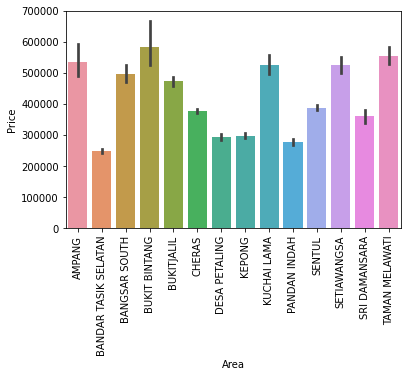

In [ ]:
#plot barplot
sns.barplot(x=df['Area'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def is_num(x):
    try:
        float(x)
    except:
        return True
    return False

In [ ]:
df = df[~df['Bedrooms'].apply(is_num)]
df.head(10)

,Price,Area,Bedrooms,Bathrooms,sqft,price_per_sqft
0,690000,AMPANG,2,2,886,778.781038
1,420000,AMPANG,3,2,858,489.510490
2,420000,AMPANG,3,2,860,488.372093
3,568444,AMPANG,3,2,1037,548.162006
4,618000,AMPANG,4,2,1650,374.545455
5,428000,AMPANG,4,2,1250,342.400000
6,450000,AMPANG,1,1,705,638.297872
7,368000,AMPANG,3,2,957,384.535005
8,525000,AMPANG,3,2,1420,369.718310
9,680000,AMPANG,5,4,1865,364.611260


In [ ]:
df[["Bedrooms", "Bathrooms"]] = df[["Bedrooms", "Bathrooms"]].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


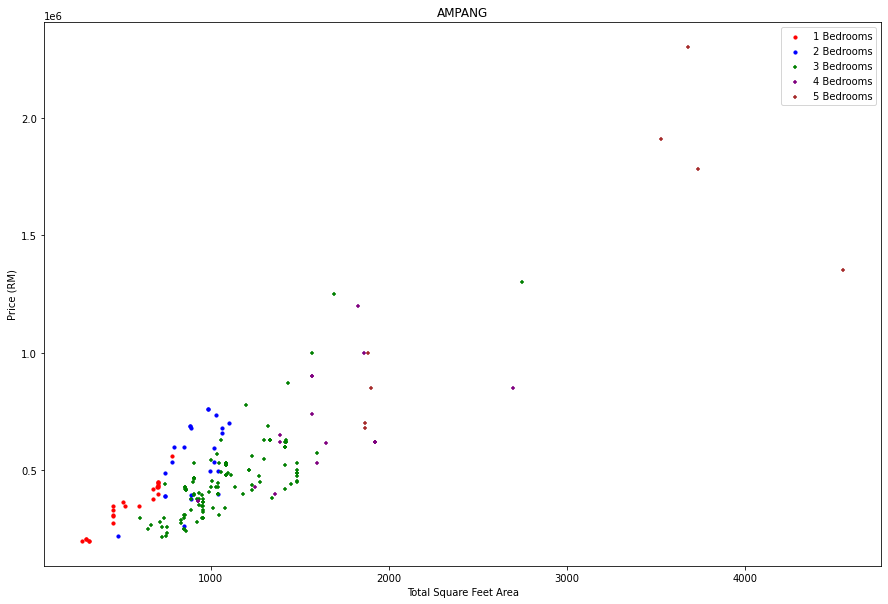

In [ ]:
##visual using scatter plot
def plot_scatter_chart(df,Area):
    bdr1 = df[(df.Area==Area) & (df.Bedrooms==1)]
    bdr2 = df[(df.Area==Area) & (df.Bedrooms==2)]
    bdr3 = df[(df.Area==Area) & (df.Bedrooms==3)]
    bdr4 = df[(df.Area==Area) & (df.Bedrooms==4)]
    bdr5 = df[(df.Area==Area) & (df.Bedrooms==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bdr1.sqft,bdr1.Price,color='red',label='1 Bedrooms', s=10)
    plt.scatter(bdr2.sqft,bdr2.Price,color='blue',label='2 Bedrooms', s=10)
    plt.scatter(bdr3.sqft,bdr3.Price,marker='+', color='green',label='3 Bedrooms', s=10)
    plt.scatter(bdr4.sqft,bdr4.Price,marker='+', color='purple',label='4 Bedrooms', s=10)
    plt.scatter(bdr5.sqft,bdr5.Price,marker='+', color='brown',label='5 Bedrooms', s=10)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (RM)")
    plt.title(Area)
    plt.legend()
    
plot_scatter_chart(df,"AMPANG")

In [ ]:
def remove_bdr_outliers(df):
    exclude_indices = np.array([])
    for Area, Area_df in df.groupby('Area'):
        bdr_stats = {}
        for bdr, bdr_df in Area_df.groupby('Bedrooms'):
            bdr_stats[bdr] = {
                'mean': np.mean(bdr_df.price_per_sqft),
                'std': np.std(bdr_df.price_per_sqft),
                'count': bdr_df.shape[0]
            }
        for bdr, bdr_df in Area_df.groupby('Bedrooms'):
            stats = bdr_stats.get(bdr-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bdr_df[bdr_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bdr_outliers(df)

df.shape

(2988, 6)

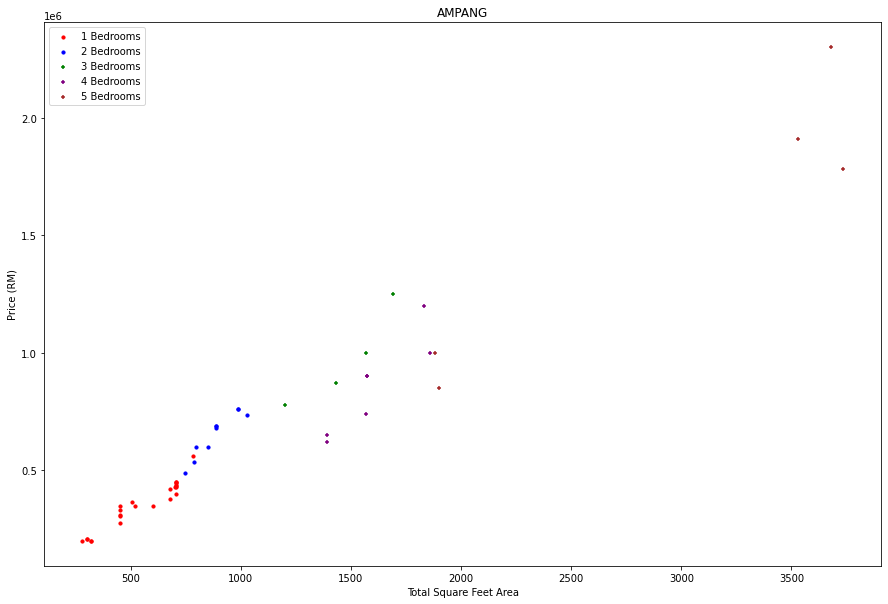

In [ ]:
plot_scatter_chart(df,"AMPANG")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


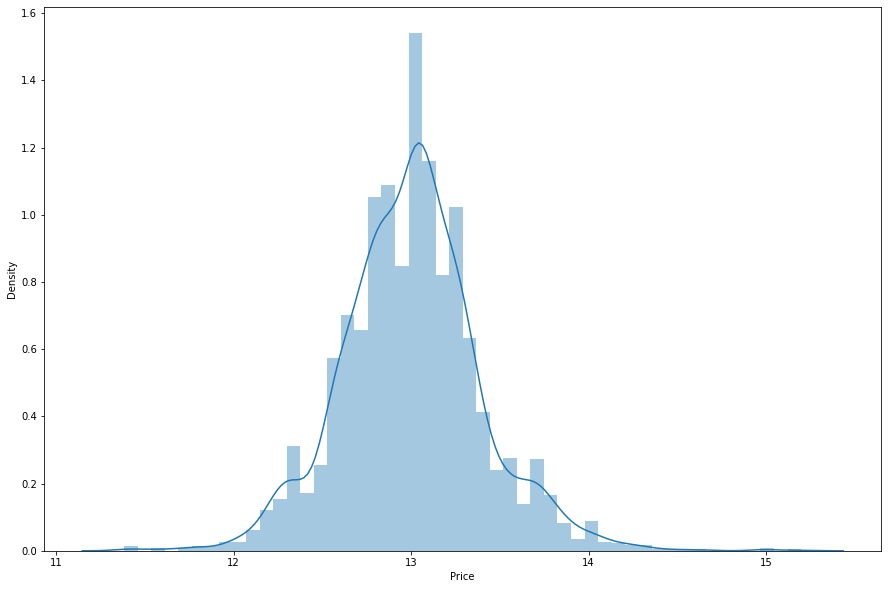

In [ ]:
sns.distplot(np.log(df['Price']))
plt.show()

In [ ]:
#rearrange the label to last column
df = df[['Area', 'Bedrooms', 'Bathrooms', 'sqft', 'price_per_sqft','Price']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
#split dataset in features and target variable
X = df.drop(columns=['Price','price_per_sqft'])# Features
y = np.log(df['Price'])# Target variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2) 
X

,Area,Bedrooms,Bathrooms,sqft
0,AMPANG,2,2,886
6,AMPANG,1,1,705
14,AMPANG,5,3,1882
31,AMPANG,2,2,796
35,AMPANG,1,1,450
...,...,...,...,...
6955,TAMAN MELAWATI,6,5,3556
6962,TAMAN MELAWATI,4,4,1580
6963,TAMAN MELAWATI,1,1,499
6969,TAMAN MELAWATI,3,2,1098


In [ ]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9327491823228495
MAE 0.06664667414763863


In [ ]:
import pickle
df.to_csv('house_price.csv',index = False)
pickle.dump(pipe,open('house_price.pkl','wb'))

In [ ]:
%%writefile myfirstapp2.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd

#dataset source:https://www.kaggle.com/thajegan76/properties-kuala-lumpur-malaysia/data
#reference website 1: https://www.analyticsvidhya.com/blog/2021/11/laptop-price-prediction-practical-understanding-of-machine-learning-project-lifecycle/
#ref website 2:https://github.com/Jcharis/Streamlit_DataScience_Apps/tree/master/EDA_app_with_Streamlit_Components

#load the model and dataframe
df = pd.read_csv('house_price.csv')
pipe = pickle.load(open('house_price.pkl', "rb"))

#Theme


#Sidebar 

# EDA Pkgs
import pandas as pd 
import codecs

# Components Pkgs
import streamlit.components.v1 as components

# analyzing the dataset and displat the report
import sweetviz as sv 
def st_display_sweetviz(report_html,width=1000,height=1000):
                    report_file = codecs.open(report_html,'r')
                    page = report_file.read()
                    components.html(page,width=width,height=height,scrolling=True)
    

footer_temp = """
     <!-- CSS  -->
     <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
     <link href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css" type="text/css" rel="stylesheet" media="screen,projection"/>
     <link href="static/css/style.css" type="text/css" rel="stylesheet" media="screen,projection"/>
     <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.5.0/css/all.css" integrity="sha384-B4dIYHKNBt8Bc12p+WXckhzcICo0wtJAoU8YZTY5qE0Id1GSseTk6S+L3BlXeVIU" crossorigin="anonymous">
     <footer class="page-footer grey darken-4">
     <div class="container" id="aboutapp">
        <div class="row">
            <div class="col l6 s12">
              <h5 class="white-text">Apartment Price Prediction App</h5>
              <p class="grey-text text-lighten-4">Using Streamlit,Pandas and SweetViz.</p>
            </div>
          
       <div class="col l3 s12">
              <h5 class="white-text">Connect With Me</h5>
              <ul>
              <a href="https://gh.linkedin.com/in/kian-kun-gan-4920a1228" target="_blank" class="white-text">
                <i class="fab fa-linkedin fa-4x"></i>
                  </a>
               <a href="https://github.com/kkgan918/" target="_blank" class="white-text">
                <i class="fab fa-github-square fa-4x"></i>
           </a>
              </ul>
            </div>
          </div>
        </div>
        <div class="footer-copyright">
          <div class="container">
          Made by <a class="white-text text-lighten-3">Gan Kian Kun</a><br/>
          <a class="white-text text-lighten-3">gankk03@gmail.com</a>
          </div>
        </div>
      </footer>
    """


def main():
    """Finding Your Dream Home?"""

    menu = ["Home","Sweetviz","About"]
    choice = st.sidebar.selectbox("Menu",menu)

    if choice == "Sweetviz":
        st.subheader("Automated EDA with Sweetviz")
        df = pd.read_csv('house_price.csv')
        st.dataframe(data=df, width=1000, height=300)
        if st.button("Generate Sweetviz Report"):

                # Normal Workflow
                report = sv.analyze(df, target_feat="Price")
                report.show_html()
                st_display_sweetviz("SWEETVIZ_REPORT.html")
                            
                
    elif choice == "About":
        st.subheader("About This App")
        # components.iframe('https://jcharistech.com')
        components.html(footer_temp,height=500)

    else:
        #Header
        st.header("Finding Your Dream Home?")
        st.subheader("Let Us Help You")

        components.html("""
            <style>
            * {box-sizing: border-box}
            body {font-family: Verdana, sans-serif; margin:0}
            .mySlides {display: none}
            img {vertical-align: middle;}
            /* Slideshow container */
            .slideshow-container {
              max-width: 1000px;
              position: relative;
              margin: auto;
            }
            /* Next & previous buttons */
            .prev, .next {
              cursor: pointer;
              position: absolute;
              top: 50%;
              width: auto;
              padding: 16px;
              margin-top: -22px;
              color: white;
              font-weight: bold;
              font-size: 18px;
              transition: 0.6s ease;
              border-radius: 0 3px 3px 0;
              user-select: none;
            }
            /* Position the "next button" to the right */
            .next {
              right: 0;
              border-radius: 3px 0 0 3px;
            }
            /* On hover, add a black background color with a little bit see-through */
            .prev:hover, .next:hover {
              background-color: rgba(0,0,0,0.8);
            }
            /*  */
            .text {
              color: #f2f2f2;
              font-size: 15px;
              padding: 8px 12px;
              position: absolute;
              bottom: 8px;
              width: 100%;
              text-align: center;
            }
            /*  */
            .numbertext {
              color: #f2f2f2;
              font-size: 12px;
              padding: 8px 12px;
              position: absolute;
              top: 0;
            }
            /* The dots/bullets/indicators */
            .dot {
              cursor: pointer;
              height: 15px;
              width: 15px;
              margin: 0 2px;
              background-color: #bbb;
              border-radius: 50%;
              display: inline-block;
              transition: background-color 0.6s ease;
            }
            .active, .dot:hover {
              background-color: #717171;
            }
            /* Fading animation */
            .fade {
              -webkit-animation-name: fade;
              -webkit-animation-duration: 1s;
              animation-name: fade;
              animation-duration: 1s;
            }
            @-webkit-keyframes fade {
              from {opacity: .4} 
              to {opacity: 1}
            }
            @keyframes fade {
              from {opacity: .4} 
              to {opacity: 1}
            }
            /* On smaller screens, decrease text size */
            @media only screen and (max-width: 300px) {
              .prev, .next,.text {font-size: 11px}
            }
            </style>
            </head>
            <body>
            <div class="slideshow-container">
            <div class="mySlides fade">
              <div class="numbertext">1 / 3</div>
              <img src="https://www.puredestinations.co.uk/wp-content/uploads/2016/06/kuala-lumpur-luxury-holidays-header-1600x500.jpg" style="width:100%">
              <div class="text"> </div>
            </div>
            <div class="mySlides fade">
              <div class="numbertext">2 / 3</div>
              <img src="https://apac-marketing.webbeds.com/wp-content/uploads/2018/08/banyan-header.png" style="width:100%">
              <div class="text"> </div>
            </div>
            <div class="mySlides fade">
              <div class="numbertext">3 / 3</div>
              <img src="https://s7d2.scene7.com/is/image/ritzcarlton/RCR_Kuala_Lumpur_-_Wadding_pool_for_website?$XlargeViewport100pct$" style="width:100%">
              <div class="text">Caption Three</div>
            </div>
            <a class="prev" onclick="plusSlides(-1)">&#10094;</a>
            <a class="next" onclick="plusSlides(1)">&#10095;</a>
            </div>
            <br>
            <div style="text-align:center">
              <span class="dot" onclick="currentSlide(1)"></span> 
              <span class="dot" onclick="currentSlide(2)"></span> 
            <span class="dot" onclick="currentSlide(3)"></span> 
            </div>
            <script>
            var slideIndex = 1;
            showSlides(slideIndex);
            function plusSlides(n) {
            showSlides(slideIndex += n);
            }
            function currentSlide(n) {
            showSlides(slideIndex = n);
            }
            function showSlides(n) {
              var i;
              var slides = document.getElementsByClassName("mySlides");
              var dots = document.getElementsByClassName("dot");
              if (n > slides.length) {slideIndex = 1}    
              if (n < 1) {slideIndex = slides.length}
              for (i = 0; i < slides.length; i++) {
              slides[i].style.display = "none";  
              }
              for (i = 0; i < dots.length; i++) {
              dots[i].className = dots[i].className.replace(" active", "");
              }
              slides[slideIndex-1].style.display = "block";  
              dots[slideIndex-1].className += " active";
            }
            </script>
             """)
        #Now we will take user input one by one as per our dataframe
        df = pd.read_csv('house_price.csv')
        #Area
        Area = st.selectbox('Location', df['Area'].unique())
        #Bedrooms
        Bedrooms = st.number_input('Bedrooms',min_value=0,key=0)
        #Bathrooms
        Bathrooms = st.number_input('Bathrooms',min_value=0,key=1)
        #sqft
        sqft = st.number_input("Area (in psf)",min_value=300)


        #Prediction
        if st.button("Predict Price ◀", kwargs={
       'clicked_button_ix': 3, 'n_buttons': 4}):
            query = np.array([Area,Bedrooms,Bathrooms,sqft])
            query = query.reshape(1, 4)
            prediction = str(int(np.exp(pipe.predict(query)[0])))
            st.subheader("The predicted price of this apartment is RM" + prediction)




if __name__ == '__main__':
	main()



Overwriting myfirstapp2.py
